## Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [75]:
"""
import pandas as pd

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)

# Load the datasets
def get_dataset():
    merged_df1 = pd.read_csv('../databases/2018/student2018.csv')
    merged_df2 = pd.read_csv('../databases/2018/only_teacher2018.csv')
    merged_df1.merge(merged_df2, on=['CNT', 'CNTSCHID'], how='inner')
    return merged_df1

# Save the merged dataset to a CSV file
teacher_student = get_dataset()
teacher_student.to_csv('../databases/2018/teacher_student2018.csv', index=False)


"""

'\nimport pandas as pd\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n\n# Load the datasets\ndef get_dataset():\n    merged_df1 = pd.read_csv(\'../databases/2018/student2018.csv\')\n    merged_df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\')\n    merged_df1.merge(merged_df2, on=[\'CNT\', \'CNTSCHID\'], how=\'inner\')\n    return merged_df1\n\n# Save the merged dataset to a CSV file\nteacher_student = get_dataset()\nteacher_student.to_csv(\'../databases/2018/teacher_student2018.csv\', index=False)\n\n\n'

The teacher dataset does not have the information for the student's performance, we need to join them based on `CNT` and `CNTSCHID` columns (according to https://www.oecd.org/en/about/programmes/pisa/how-to-prepare-and-analyse-the-pisa-database.html)

In this document we will only analise the teacher dataset

In [76]:
import pandas as pd

#teacher = pd.read_csv('../../../databases/2018/only_teacher2018.csv', nrows=1000)
teacher = pd.read_csv('../../../databases/2018/only_teacher2018.csv')

## **2.2 Describe Data**

The original dataset has 350 features

In [77]:
teacher.head(5)

,CNTRYID,CNT,CNTSCHID,CNTTCHID,TEACHERID,CYC,NatCen,Region,STRATUM,SUBNATIO,...,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,VER_DAT
0,8.0,b'ALB',800057.0,800001.0,5.0,b'07MS',b'000800',800.0,b'ALB0203',b'0080000',...,0.6122,NaN,NaN,1.2332,1.2735,-0.1151,1.9399,3.45567,93.30319,b' 09MAY19:11:21:10'
1,8.0,b'ALB',800121.0,800002.0,5.0,b'07MS',b'000800',800.0,b'ALB0107',b'0080000',...,-1.2284,NaN,NaN,-0.8666,1.8008,-0.1151,-0.2634,6.07334,12.46632,b' 09MAY19:11:21:10'
2,8.0,b'ALB',800140.0,800003.0,5.0,b'07MS',b'000800',800.0,b'ALB0101',b'0080000',...,0.2741,NaN,NaN,0.4987,1.8008,0.5387,-0.7038,3.76885,99.20152,b' 09MAY19:11:21:10'
3,8.0,b'ALB',800149.0,800004.0,5.0,b'07MS',b'000800',800.0,b'ALB0211',b'0080000',...,-0.2922,NaN,NaN,1.2332,0.2917,-0.6041,-1.0056,6.62948,19.88845,b' 09MAY19:11:21:10'
4,8.0,b'ALB',800095.0,800005.0,5.0,b'07MS',b'000800',800.0,b'ALB0204',b'0080000',...,0.1202,NaN,NaN,0.4987,1.0055,-1.9057,1.9399,3.35644,104.76897,b' 09MAY19:11:21:10'


In [78]:
teacher.describe()

,CNTRYID,CNTSCHID,CNTTCHID,TEACHERID,Region,OECD,ADMINMODE,LANGTEST,TC001Q01NA,TC002Q01NA,...,TCDIRINS,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
count,107367.000000,1.073670e+05,1.073670e+05,91190.000000,107367.000000,107367.000000,107367.0,93006.000000,90090.000000,90326.000000,...,27293.000000,62184.000000,27312.000000,27309.000000,48908.000000,58111.000000,52577.000000,52481.000000,107367.000000,107367.000000
mean,482.540324,4.825551e+07,4.825868e+07,4.694188,48256.795766,0.444820,2.0,260.170150,1.368432,43.240374,...,0.148607,0.194940,0.073665,0.169752,-0.157354,0.221334,0.045425,0.150496,18.838765,1822.106210
std,271.547890,2.715644e+07,2.715653e+07,0.460753,27156.811300,0.496948,0.0,134.130385,0.482382,10.079831,...,1.045973,1.010828,1.032449,0.992757,1.094769,1.080615,0.944777,1.020194,43.119851,4225.350641
min,8.000000,8.000020e+05,8.000010e+05,4.000000,800.000000,0.000000,2.0,140.000000,1.000000,20.000000,...,-3.935500,-3.212900,-4.309800,-3.612100,-4.280200,-1.341300,-2.716000,-2.497200,0.863540,1.000000
25%,214.000000,2.140019e+07,2.140210e+07,4.000000,21400.000000,0.000000,2.0,156.000000,1.000000,35.000000,...,-0.575700,-0.480900,-0.625700,-0.496200,-0.866600,-0.441100,-0.551100,-0.263400,1.661430,143.524340
50%,591.000000,5.910005e+07,5.910072e+07,5.000000,59100.000000,0.000000,2.0,232.000000,1.000000,43.000000,...,0.167900,0.197400,-0.024800,0.015100,-0.159800,0.182300,-0.115100,-0.263400,4.987000,441.804960
75%,724.000000,7.240068e+07,7.241347e+07,5.000000,72413.000000,1.000000,2.0,313.000000,2.000000,51.000000,...,1.359600,0.899300,0.719600,0.990900,0.659600,1.075900,1.125000,1.038000,18.915760,1990.819100
max,840.000000,8.400018e+07,8.400378e+07,5.000000,84000.000000,1.000000,2.0,803.000000,2.000000,70.000000,...,1.365600,1.854200,2.453300,1.610100,1.302600,1.800800,1.125000,1.943600,1294.020030,49343.580530


In [79]:
teacher.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107367 entries, 0 to 107366
Data columns (total 350 columns):
 #    Column            Non-Null Count   Dtype  
---   ------            --------------   -----  
 0    CNTRYID           107367 non-null  float64
 1    CNT               107367 non-null  object 
 2    CNTSCHID          107367 non-null  float64
 3    CNTTCHID          107367 non-null  float64
 4    TEACHERID         91190 non-null   float64
 5    CYC               107367 non-null  object 
 6    NatCen            107367 non-null  object 
 7    Region            107367 non-null  float64
 8    STRATUM           107367 non-null  object 
 9    SUBNATIO          107367 non-null  object 
 10   OECD              107367 non-null  float64
 11   ADMINMODE         107367 non-null  float64
 12   LANGTEST          93006 non-null   float64
 13   TC001Q01NA        90090 non-null   float64
 14   TC002Q01NA        90326 non-null   float64
 15   TC005Q01NA        90408 non-null   float64
 16   

Key codes with description

In [80]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTTCHID: Intl. Teacher ID
TEACHERID: Teacher identification code
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
Region: Region
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST: Language of Questionnaire/Assessment
TC001Q01NA: Are you female or male?
TC002Q01NA: How old are you?
TC005Q01NA: What is your current employment status as a teacher? My employment status at this school
TC007Q01NA: How many years of work experience do you have? Year(s) working as a teacher at this school
TC007Q02NA: How many years of work experience do you have? Year(s) working as a teacher in total
TC014Q01HA: Did you complete a teacher education or training programme?
TC015Q01NA: How d

The dataset is composed by 343 numeric columns and only 7 categorical columns (this data includes the plausible values from the student dataset, these are 30 columns, so the composed numeric columns would be 350 for the teacher dataset).

In [81]:
import pandas as pd

categorical_columns = teacher.select_dtypes(include=["object", "category"]).columns
numeric_columns = teacher.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
    }
)

print(column_types_df)

   Column type  Number of columns
0      Numeric                343
1  Categorical                  7


Summarize the unique values to analise uniqque categories by feature, check missing values and description of the features:
1. Numeric
2. Categorical

In [82]:
# 1. Resumo da distribuição de numeric
def summarize(dataframe, type, data_map):
    summary = {}

    for col in dataframe.select_dtypes(include=type).columns:
        value_counts = dataframe[col].value_counts()
        missing = dataframe[col].isnull().sum()
        unique = dataframe[col].nunique()

        summary[col] = {
            'Unique Categories': unique,
            'Top Categories': value_counts.head(5).to_dict(),
            'Missing Values': missing,
            'Percentage Missing': round((missing / len(dataframe)) * 100, 2),
            'Description': data_map.map_enum[col].value if col in data_map.map_enum.__members__ else "No Description"
        }

    return pd.DataFrame.from_dict(summary, orient='index')

In [83]:
# 1. Numeric
numeric_summary = summarize(teacher,["int64", "float64"], data_map)
numeric_summary.style

#del numeric_summary

,Unique Categories,Top Categories,Missing Values,Percentage Missing,Description
CNTRYID,19,"{724.0: 21621, 784.0: 12358, 76.0: 8969, 276.0: 6687, 620.0: 5452}",0,0.000000,Country Identifier
CNTSCHID,5563,"{44600031.0: 160, 44600008.0: 133, 44600011.0: 106, 44600020.0: 103, 44600013.0: 102}",0,0.000000,Intl. School ID
CNTTCHID,107367,"{84003779.0: 1, 800001.0: 1, 800002.0: 1, 800003.0: 1, 800004.0: 1}",0,0.000000,Intl. Teacher ID
TEACHERID,2,"{5.0: 63303, 4.0: 27887}",16177,15.070000,Teacher identification code
Region,41,"{78400.0: 12358, 27600.0: 6687, 62000.0: 5452, 60400.0: 5146, 45800.0: 4737}",0,0.000000,Region
OECD,2,"{0.0: 59608, 1.0: 47759}",0,0.000000,OECD country
ADMINMODE,1,{2.0: 107367},0,0.000000,Mode of Respondent
LANGTEST,15,"{156.0: 28978, 232.0: 13556, 313.0: 11718, 316.0: 9017, 500.0: 8082}",14361,13.380000,Language of Questionnaire/Assessment
TC001Q01NA,2,"{1.0: 56898, 2.0: 33192}",17277,16.090000,Are you female or male?
TC002Q01NA,51,"{40.0: 3299, 42.0: 3112, 38.0: 3067, 50.0: 3016, 45.0: 2962}",17041,15.870000,How old are you?


In [84]:
# 2. Categorical
categorical_summary = summarize(teacher, ['object'], data_map)
categorical_summary.style

#del categorical_summary

,Unique Categories,Top Categories,Missing Values,Percentage Missing,Description
CNT,19,"{""b'ESP'"": 21621, ""b'ARE'"": 12358, ""b'BRA'"": 8969, ""b'DEU'"": 6687, ""b'PRT'"": 5452}",0,0.000000,Country code 3-character
CYC,1,"{""b'07MS'"": 107367}",0,0.000000,PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen,19,"{""b'072400'"": 21621, ""b'078400'"": 12358, ""b'007600'"": 8969, ""b'027600'"": 6687, ""b'062000'"": 5452}",0,0.000000,National Centre 6-digit Code
STRATUM,311,"{""b'DEU9797'"": 6687, ""b'MYS0101'"": 3698, ""b'PER0101'"": 3423, ""b'HKG0002'"": 2909, ""b'BRA0414'"": 2861}",0,0.000000,Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO,19,"{""b'7240000'"": 21621, ""b'7840000'"": 12358, ""b'0760000'"": 8969, ""b'2760000'"": 6687, ""b'6200000'"": 5452}",0,0.000000,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
COBN_T,66,"{""b'999999'"": 44651, ""b'072400'"": 12882, ""b'007600'"": 5253, ""b'060400'"": 3680, ""b'978400'"": 3217}",0,0.000000,Country of birth national categories - Teacher
VER_DAT,20,"{""b' 26APR19:08:56:20'"": 21621, ""b' 24JUN19:16:00:18'"": 12358, ""b' 26APR19:08:20:49'"": 8969, ""b' 29APR19:09:29:45'"": 6687, ""b' 30APR19:12:22:07'"": 5452}",0,0.000000,Date of the database creation


The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.

## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

We can't analise performance with the teacher dataset, because the plausible score values are in the student dataset, we need to join both datasets.
The analisis of the joint dataset will be in (data_understanding_teacher_student.ipynb)

We can see the dataset includes only ["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'"
 "b'ARE'" "b'GBR'" "b'USA'"], so we should remove student data from other countries


In [85]:
# Print the list of unique countries from the 'CNT' column
print(teacher['CNT'].unique())

["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'"
 "b'ARE'" "b'GBR'" "b'USA'"]


Like the student datase, in the teachers spain has more data related to teachers

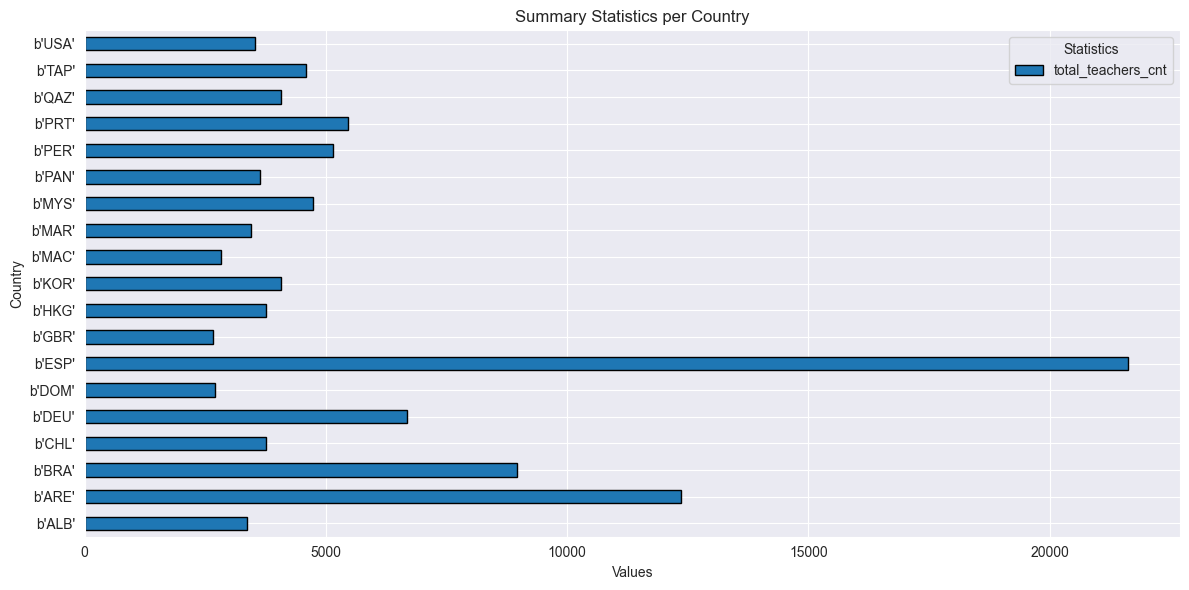

In [86]:
import matplotlib.pyplot as plt

# Group by teacher (CNTTCHID) with students performance aggregated
summary = teacher.groupby('CNT').agg(
    total_teachers_cnt=('CNT', 'count')
).reset_index()

# Set country as index for plotting
summary.set_index('CNT')[['total_teachers_cnt']].plot(
    kind='barh',
    figsize=(12, 6),
    edgecolor='black'
)

# Add labels and title

plt.title("Summary Statistics per Country")
plt.xlabel("Values")
plt.ylabel("Country")
plt.legend(title="Statistics")
plt.tight_layout()
plt.show()


### Categorical values analysis

Regarding the categorical values, there are a few of them that are country specific. Since this study focuses on identifying global trends, we chose not to include these variables in our analysis.

Additionally, the codes "CNT", "NatCen", "PROGN", "STRATUM" and "SUBNATION" are all related to the country/region. To reduce the dimensionality of the dataset, we decided to retain only "CNT", as it effectively aggregates the information from the others.

"COBN_T" represent the country of birth of the teacher. This were excluded to avoid increasing the dimensionality with features that are strongly correlated with "CNT".

The "VER_DAT" was removed, as it only contains the questionnaire date, which is not relevant to our study, "CYC" contains the dataset cycle, we can remove the weights used for PISA calculations "W_SCHGRNRABWT", "W_FSTUWT_SCH_SUM", language of Questionnaire and assessment "LANGTEST" and also remove the Mode of respondent "ADMINMODE"

## 2.4 Verify data quality

In this step we started by checking missing values in the dataset.

We've decided that variables with more than 80% missing data can lead to biased results, so they should be removed from the dataset in the future.


In [93]:
print("\n--- Missing Values ---")
missing = teacher.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.8])



--- Missing Values ---
Series([], dtype: float64)


We've also done a sanity check to see if there were any duplicated rows or columns, but there were no cases in this dataset.

In [94]:
print("\n--- Duplicated Rows ---")
print(f"Duplicated rows: {teacher.duplicated().sum()}")


--- Duplicated Rows ---
Duplicated rows: 0


In [92]:
print("\n--- Duplicated Columns ---")
print(f"Duplicated columns: {teacher.T.duplicated().sum()}")


--- Duplicated Columns ---
Duplicated columns: 0
